## Problem Statement:
### Compare the results of any three edge detection algorithms on the same image dataset and do the analysis of the result.

In [1]:
%matplotlib inline

import cv2
from cv2 import Mat
from matplotlib import pyplot as plt
import numpy as np

def cv2_imshow(image: Mat) -> None:
    plt.imshow(image)
    plt.show()

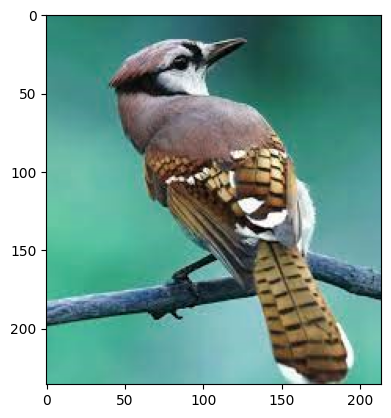

In [2]:
image_path = 'bird_image copy.jpeg'

image = cv2.imread(image_path)
cv2_imshow(image)

## 1) Sobel Operator edge detection algorithm:
This program applies the Sobel operator to find the x and y gradients. It then calculates the magnitude and angle of the gradients and creates a binary image based on the gradient magnitudes. Finally, it displays the input image and the binary image.

In [3]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the Sobel operator to find the x and y gradients of the image
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude and angle of the gradients
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
angle = np.arctan2(sobel_y, sobel_x)

# Normalize the magnitude to the range [0, 255]
magnitude = (magnitude / np.max(magnitude) * 255).astype(np.uint8)

# Create a binary image based on the gradient magnitudes
_, binary_image = cv2.threshold(magnitude, 50, 255, cv2.THRESH_BINARY)


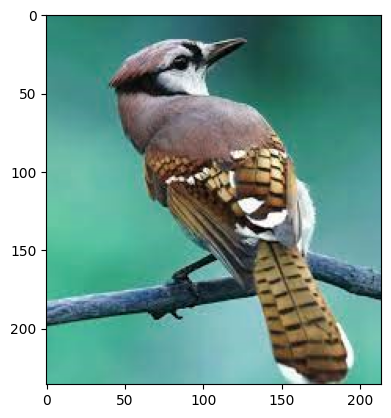

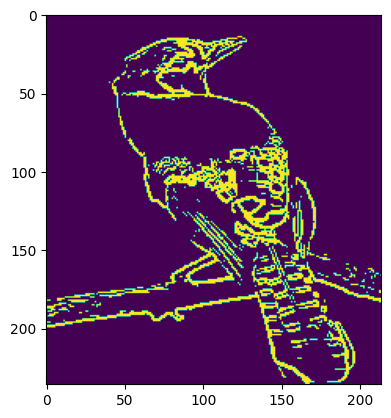

In [4]:
cv2_imshow(image)
cv2_imshow(binary_image)

## 2) Canny edge detection algorithm:
This program applies Gaussian blur to reduce noise, and then uses the Canny edge detector to find the edges in the image. It then displays the input image and the edges.
Thresholds:
low values - more edges;
high values - less edges

In [5]:
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Use the Canny edge detector to find the edges
edges = cv2.Canny(blurred, 100, 200)


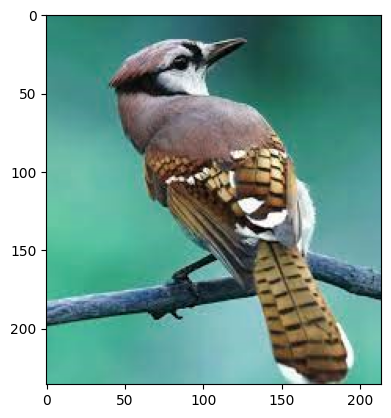

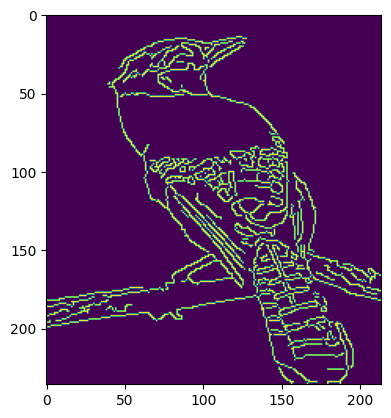

In [6]:
cv2_imshow(image)
cv2_imshow(edges)

## 3) Laplacian operator edge detection algorithm:
This program uses the Laplacian operator to find the edges in the image. It then normalizes the edge values to the range [0, 255] and displays the input image and the edges.
Large kernel - more smoothing;
Small kernel - less smoothing

In [7]:
# Use the Laplacian operator to find the edges
lap_edges = cv2.Laplacian(blurred, cv2.CV_64F)

# Normalize the edge values to the range [0, 255]
lap_edges_normalized = cv2.normalize(lap_edges, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


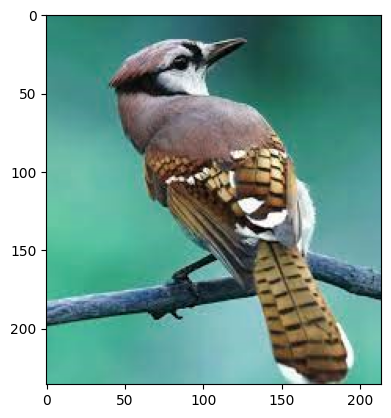

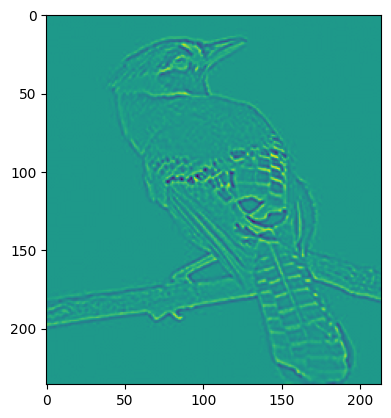

In [8]:
cv2_imshow(image)
cv2_imshow(lap_edges_normalized)